# Standardization, or mean removal and variance scaling

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

The preprocessing module provides the StandardScaler utility class, which is a quick and easy way to perform the following operation on an array-like dataset:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import preprocessing

In [3]:
import numpy as np

In [4]:
x_train = np.array([[10,20,30],
                   [45,85,76],
                   [74,85,76]])

In [5]:
x_train

array([[10, 20, 30],
       [45, 85, 76],
       [74, 85, 76]])

In [6]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [7]:
scaler

StandardScaler()

In [8]:
scaler.mean_

array([43.        , 63.33333333, 60.66666667])

In [9]:
scaler.scale_

array([26.16613588, 30.64129385, 21.68460796])

In [10]:
X_scaled = scaler.transform(x_train)

In [11]:
X_scaled

array([[-1.26117208, -1.41421356, -1.41421356],
       [ 0.07643467,  0.70710678,  0.70710678],
       [ 1.18473741,  0.70710678,  0.70710678]])

In [12]:
X_scaled.mean(axis = 0)

array([ 0.00000000e+00, -7.40148683e-17,  1.48029737e-16])

In [13]:
X_scaled.std(axis = 0)

array([1., 1., 1.])

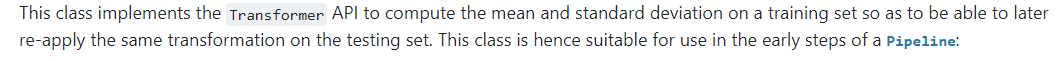

In [14]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [15]:
x,y = make_classification(random_state = 4)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42)

In [17]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [18]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [19]:
pipe.score(x_test,y_test)

0.84

# Scaling features to a range

An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using MinMaxScaler or MaxAbsScaler, respectively.

The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

Here is an example to scale a toy data matrix to the [0, 1] range:

In [20]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [21]:
min_max_scaler = preprocessing.MinMaxScaler()

In [22]:
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [23]:
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [24]:
X_test = np.array([[-3., -1.,  4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

In [25]:
min_max_scaler.scale_

array([0.5       , 0.5       , 0.33333333])

In [26]:
min_max_scaler.min_

array([0.        , 0.5       , 0.33333333])

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler

# MaxAbs Scaler 

MaxAbsScaler works in a very similar fashion, but scales in a way that the training data lies within the range [-1, 1] by dividing through the largest maximum value in each feature. It is meant for data that is already centered at zero or sparse data.

Here is how to use the toy data from the previous example with this scaler:

In [28]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [29]:
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [30]:
X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs

array([[-1.5, -1. ,  2. ]])

In [31]:
max_abs_scaler.scale_

array([2., 1., 2.])

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler

# Scaling sparse data

Centering sparse data would destroy the sparseness structure in the data, and thus rarely is a sensible thing to do. However, it can make sense to scale sparse inputs, especially if features are on different scales.

MaxAbsScaler was specifically designed for scaling sparse data, and is the recommended way to go about this. However, StandardScaler can accept scipy.sparse matrices as input, as long as with_mean=False is explicitly passed to the constructor. Otherwise a ValueError will be raised as silently centering would break the sparsity and would often crash the execution by allocating excessive amounts of memory unintentionally. RobustScaler cannot be fitted to sparse inputs, but you can use the transform method on sparse inputs.

Note that the scalers accept both Compressed Sparse Rows and Compressed Sparse Columns format (see scipy.sparse.csr_matrix and scipy.sparse.csc_matrix). Any other sparse input will be converted to the Compressed Sparse Rows representation. To avoid unnecessary memory copies, it is recommended to choose the CSR or CSC representation upstream.

Finally, if the centered data is expected to be small enough, explicitly converting the input to an array using the toarray method of sparse matrices is another option.

# Scaling data with outliers

If your data contains many outliers, scaling using the mean and variance of the data is likely to not work very well. In these cases, you can use RobustScaler as a drop-in replacement instead. It uses more robust estimates for the center and range of your data.

## RobustScaler

Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results.

In [32]:
from sklearn.preprocessing import RobustScaler

In [33]:
X = [[ 1., -2.,  2.],
     [ -2.,  1.,  3.],
     [ 4.,  1., -2.]]

In [34]:
X

[[1.0, -2.0, 2.0], [-2.0, 1.0, 3.0], [4.0, 1.0, -2.0]]

In [35]:
transformer = RobustScaler().fit(X)
transformer

RobustScaler()

In [36]:
transformer.transform(X)


array([[ 0. , -2. ,  0. ],
       [-1. ,  0. ,  0.4],
       [ 1. ,  0. , -1.6]])

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler

# Centering kernel matrices

## KernelCenterer

Center a kernel matrix.

Let K(x, z) be a kernel defined by phi(x)^T phi(z), where phi is a function mapping x to a Hilbert space. KernelCenterer centers (i.e., normalize to have zero mean) the data without explicitly computing phi(x). It is equivalent to centering phi(x) with sklearn.preprocessing.StandardScaler(with_std=False).

In [37]:
from sklearn.preprocessing import KernelCenterer
from sklearn.metrics.pairwise import pairwise_kernels

In [38]:
X = [[ 1., -2.,  2.],
     [ -2.,  1.,  3.],
     [ 4.,  1., -2.]]
K = pairwise_kernels(X, metric='linear')
K

array([[  9.,   2.,  -2.],
       [  2.,  14., -13.],
       [ -2., -13.,  21.]])

In [39]:
transformer = KernelCenterer().fit(K)
transformer

KernelCenterer()

In [40]:
transformer.transform(K)

array([[  5.,   0.,  -5.],
       [  0.,  14., -14.],
       [ -5., -14.,  19.]])

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KernelCenterer.html#sklearn-preprocessing-kernelcenterer

# Non-linear transformation

## QuantileTransformer

class sklearn.preprocessing.QuantileTransformer(*, n_quantiles=1000, output_distribution='uniform', ignore_implicit_zeros=False, subsample=100000, random_state=None, copy=True)

Transform features using quantiles information.

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

The transformation is applied on each feature independently. First an estimate of the cumulative distribution function of a feature is used to map the original values to a uniform distribution. The obtained values are then mapped to the desired output distribution using the associated quantile function. Features values of new/unseen data that fall below or above the fitted range will be mapped to the bounds of the output distribution. Note that this transform is non-linear. It may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable.

QuantileTransformer provides a non-parametric transformation to map the data to a uniform distribution with values between 0 and 1:

In [43]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer

In [44]:
rng = np.random.RandomState(0)

In [45]:
X = np.sort(rng.normal(loc=0.5, scale=0.25, size=(25, 1)), axis=0)

In [46]:
qt = QuantileTransformer(n_quantiles=10, random_state=0)
qt

QuantileTransformer(n_quantiles=10, random_state=0)

In [47]:
qt.fit_transform(X)

array([[0.        ],
       [0.09871873],
       [0.10643612],
       [0.11754671],
       [0.21017437],
       [0.21945445],
       [0.23498666],
       [0.32443642],
       [0.33333333],
       [0.41360794],
       [0.42339464],
       [0.46257841],
       [0.47112236],
       [0.49834237],
       [0.59986536],
       [0.63390302],
       [0.66666667],
       [0.68873101],
       [0.69611125],
       [0.81280699],
       [0.82160354],
       [0.88126439],
       [0.90516028],
       [0.99319435],
       [1.        ]])

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer

In [48]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [49]:
X, y = load_iris(return_X_y=True)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [51]:
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)

In [52]:
X_train_trans = quantile_transformer.fit_transform(X_train)

In [53]:
X_test_trans = quantile_transformer.transform(X_test)

In [54]:
X_test_trans

array([[0.50900901, 0.26576577, 0.71621622, 0.97747748],
       [0.57657658, 0.01351351, 0.42342342, 0.35585586],
       [0.36036036, 0.99399399, 0.10810811, 0.13513514],
       [0.94144144, 0.31531532, 0.96096096, 0.7027027 ],
       [0.17567568, 0.81081081, 0.1981982 , 0.13513514],
       [0.65315315, 0.74774775, 0.92792793, 1.        ],
       [0.17567568, 0.86936937, 0.04504505, 0.25675676],
       [0.80630631, 0.57657658, 0.5990991 , 0.59009009],
       [0.85135135, 0.26576577, 0.61711712, 0.54504505],
       [0.59459459, 0.26576577, 0.42342342, 0.47747748],
       [0.59459459, 0.16216216, 0.83333333, 0.54504505],
       [0.7027027 , 0.66666667, 0.55405405, 0.59009009],
       [0.59459459, 0.26576577, 0.5990991 , 0.41441441],
       [0.74324324, 0.26576577, 0.58108108, 0.59009009],
       [0.59459459, 0.31531532, 0.5990991 , 0.54504505],
       [0.12612613, 0.8963964 , 0.10810811, 0.        ],
       [0.57657658, 0.31531532, 0.55405405, 0.59009009],
       [0.36036036, 0.16216216,

In [55]:
np.percentile(X_train[:, 0], [0, 25, 50, 75, 100]) 

array([4.3, 5.1, 5.8, 6.5, 7.9])

This feature corresponds to the sepal length in cm. Once the quantile transformation applied, those landmarks approach closely the percentiles previously defined:

In [56]:
np.percentile(X_train_trans[:, 0], [0, 25, 50, 75, 100])

array([0.        , 0.23873874, 0.50900901, 0.74324324, 1.        ])

This can be confirmed on a independent testing set with similar remarks:

In [57]:
np.percentile(X_test[:, 0], [0, 25, 50, 75, 100])

array([4.4  , 5.125, 5.75 , 6.175, 7.3  ])

In [58]:
np.percentile(X_test_trans[:, 0], [0, 25, 50, 75, 100])

array([0.01351351, 0.25112613, 0.47972973, 0.60472973, 0.94144144])

# Mapping to a Gaussian distribution

## PowerTransformer

Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.

Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.

By default, zero-mean, unit-variance normalization is applied to the transformed data.

In many modeling scenarios, normality of the features in a dataset is desirable. Power transforms are a family of parametric, monotonic transformations that aim to map data from any distribution to as close to a Gaussian distribution as possible in order to stabilize variance and minimize skewness.

PowerTransformer currently provides two such power transformations, the Yeo-Johnson transform and the Box-Cox transform.

The Yeo-Johnson transform is given by:

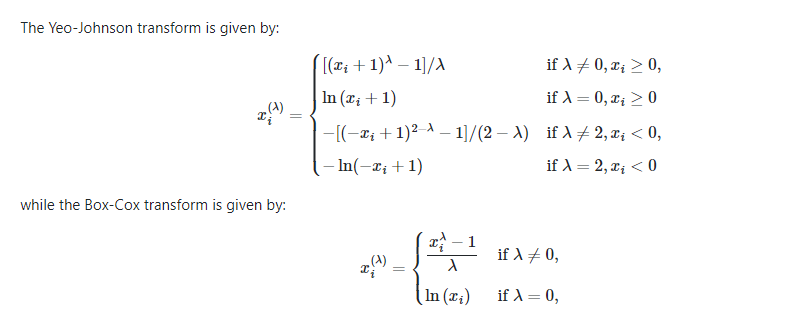

Box-Cox can only be applied to strictly positive data. In both methods, the transformation is parameterized by , which is determined through maximum likelihood estimation. Here is an example of using Box-Cox to map samples drawn from a lognormal distribution to a normal distribution:

In [59]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

In [60]:
pt = PowerTransformer()

In [61]:
data = [[1, 2], [3, 2], [4, 5]]
print(pt.fit(data))

PowerTransformer()


In [62]:
print(pt.lambdas_)

[ 1.38668178 -3.10053332]


In [63]:
print(pt.transform(data))

[[-1.31616039 -0.70710678]
 [ 0.20998268 -0.70710678]
 [ 1.1061777   1.41421356]]


https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer

In [64]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
X_lognormal = np.random.RandomState(616).lognormal(size=(3, 3))
X_lognormal

array([[1.28331718, 1.18092228, 0.84160269],
       [0.94293279, 1.60960836, 0.3879099 ],
       [1.35235668, 0.21715673, 1.09977091]])

In [65]:
pt.fit_transform(X_lognormal)

array([[ 0.49024349,  0.17881995, -0.1563781 ],
       [-0.05102892,  0.58863195, -0.57612414],
       [ 0.69420009, -0.84857822,  0.10051454]])

While the above example sets the standardize option to False, PowerTransformer will apply zero-mean, unit-variance normalization to the transformed output by default.

# Normalization

Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

This assumption is the base of the Vector Space Model often used in text classification and clustering contexts.

The function normalize provides a quick and easy way to perform this operation on a single array-like dataset, either using the l1, l2, or max norms:

In [66]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

In [67]:
X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized


array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

The preprocessing module further provides a utility class Normalizer that implements the same operation using the Transformer API (even though the fit method is useless in this case: the class is stateless as this operation treats samples independently).

This class is hence suitable for use in the early steps of a Pipeline:

In [68]:
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer

Normalizer()

The normalizer instance can then be used on sample vectors as any transformer:

In [69]:
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [70]:
normalizer.transform([[-1.,  1., 0.]])

array([[-0.70710678,  0.70710678,  0.        ]])

Note: L2 normalization is also known as spatial sign preprocessing.

# Encoding categorical features

Often features are not given as continuous values but categorical. For example a person could have features ["male", "female"], ["from Europe", "from US", "from Asia"], ["uses Firefox", "uses Chrome", "uses Safari", "uses Internet Explorer"]. Such features can be efficiently coded as integers, for instance ["male", "from US", "uses Internet Explorer"] could be expressed as [0, 1, 3] while ["female", "from Asia", "uses Chrome"] would be [1, 2, 1].

To convert categorical features to such integer codes, we can use the OrdinalEncoder. This estimator transforms each categorical feature to one new feature of integers (0 to n_categories - 1):

In [71]:
enc = preprocessing.OrdinalEncoder()

In [72]:
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]

In [73]:
enc.fit(X)

OrdinalEncoder()

In [74]:
enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

Such integer representation can, however, not be used directly with all scikit-learn estimators, as these expect continuous input, and would interpret the categories as being ordered, which is often not desired (i.e. the set of browsers was ordered arbitrarily).

Another possibility to convert categorical features to features that can be used with scikit-learn estimators is to use a one-of-K, also known as one-hot or dummy encoding. This type of encoding can be obtained with the OneHotEncoder, which transforms each categorical feature with n_categories possible values into n_categories binary features, with one of them 1, and all others 0.

## Continuing the example above:-

In [75]:
enc = preprocessing.OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

OneHotEncoder()

In [76]:
enc.transform([['female', 'from US', 'uses Safari'],
               ['male', 'from Europe', 'uses Safari']]).toarray()

array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

By default, the values each feature can take is inferred automatically from the dataset and can be found in the categories_ attribute:

In [77]:
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['from Europe', 'from US'], dtype=object),
 array(['uses Firefox', 'uses Safari'], dtype=object)]

It is possible to specify this explicitly using the parameter categories. There are two genders, four possible continents and four web browsers in our dataset:

In [78]:
genders = ['female', 'male']
locations = ['from Africa', 'from Asia', 'from Europe', 'from US']
browsers = ['uses Chrome', 'uses Firefox', 'uses IE', 'uses Safari']

In [79]:
enc = preprocessing.OneHotEncoder(categories=[genders, locations, browsers])

In [80]:
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

OneHotEncoder(categories=[['female', 'male'],
                          ['from Africa', 'from Asia', 'from Europe',
                           'from US'],
                          ['uses Chrome', 'uses Firefox', 'uses IE',
                           'uses Safari']])

In [81]:
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()

array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]])

If there is a possibility that the training data might have missing categorical features, it can often be better to specify handle_unknown='ignore' instead of setting the categories manually as above. When handle_unknown='ignore' is specified and unknown categories are encountered during transform, no error will be raised but the resulting one-hot encoded columns for this feature will be all zeros (handle_unknown='ignore' is only supported for one-hot encoding):

In [82]:
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')

In [83]:
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [84]:
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()

array([[1., 0., 0., 0., 0., 0.]])

It is also possible to encode each column into n_categories - 1 columns instead of n_categories columns by using the drop parameter. This parameter allows the user to specify a category for each feature to be dropped. This is useful to avoid co-linearity in the input matrix in some classifiers. Such functionality is useful, for example, when using non-regularized regression (LinearRegression), since co-linearity would cause the covariance matrix to be non-invertible. When this parameter is not None, handle_unknown must be set to error:

In [85]:
X = [['male', 'from US', 'uses Safari'],
     ['female', 'from Europe', 'uses Firefox']]

In [87]:
X

[['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]

In [88]:
drop_enc = preprocessing.OneHotEncoder(drop='first').fit(X)
drop_enc.categories_

[array(['female', 'male'], dtype=object),
 array(['from Europe', 'from US'], dtype=object),
 array(['uses Firefox', 'uses Safari'], dtype=object)]

In [89]:
drop_enc.transform(X).toarray()

array([[1., 1., 1.],
       [0., 0., 0.]])

One might want to drop one of the two columns only for features with 2 categories. In this case, you can set the parameter drop='if_binary'.

In [90]:
X = [['male', 'US', 'Safari'],
     ['female', 'Europe', 'Firefox'],
     ['female', 'Asia', 'Chrome']]

In [91]:
drop_enc = preprocessing.OneHotEncoder(drop='if_binary').fit(X)

In [92]:
drop_enc.categories_

[array(['female', 'male'], dtype=object),
 array(['Asia', 'Europe', 'US'], dtype=object),
 array(['Chrome', 'Firefox', 'Safari'], dtype=object)]

In [93]:
drop_enc.transform(X).toarray()

array([[1., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0.]])

In the transformed X, the first column is the encoding of the feature with categories “male”/”female”, while the remaining 6 columns is the encoding of the 2 features with respectively 3 categories each.

# OneHotEncoder

OneHotEncoder supports categorical features with missing values by considering the missing values as an additional category:

Encode categorical features as a one-hot numeric array.

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter)

By default, the encoder derives the categories based on the unique values in each feature. Alternatively, you can also specify the categories manually.

This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels.

Note: a one-hot encoding of y labels should use a LabelBinarizer instead.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

# Examples

Given a dataset with two features, we let the encoder find the unique values per feature and transform the data to a binary one-hot encoding.

In [96]:
from sklearn.preprocessing import OneHotEncoder

In [97]:
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [98]:
enc.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [99]:
enc.transform([['Female', 1], ['Male', 4]]).toarray()

array([[1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [100]:
enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])

array([['Male', 1],
       [None, 2]], dtype=object)

In [101]:
enc.get_feature_names(['gender', 'group'])

array(['gender_Female', 'gender_Male', 'group_1', 'group_2', 'group_3'],
      dtype=object)

### One can always drop the first column for each feature:

In [102]:
drop_enc = OneHotEncoder(drop='first').fit(X)
drop_enc.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [103]:
drop_enc.transform([['Female', 1], ['Male', 2]]).toarray()


array([[0., 0., 0.],
       [1., 1., 0.]])

### Or drop a column for feature only having 2 categories:

In [104]:
drop_binary_enc = OneHotEncoder(drop='if_binary').fit(X)
drop_binary_enc.transform([['Female', 1], ['Male', 2]]).toarray()

array([[0., 1., 0., 0.],
       [1., 0., 1., 0.]])

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

# Discretization

Discretization (otherwise known as quantization or binning) provides a way to partition continuous features into discrete values. Certain datasets with continuous features may benefit from discretization, because discretization can transform the dataset of continuous attributes to one with only nominal attributes.

One-hot encoded discretized features can make a model more expressive, while maintaining interpretability. For instance, pre-processing with a discretizer can introduce nonlinearity to linear models.

## K-bins discretization

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer

KBinsDiscretizer discretizes features into k bins:

In [105]:
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit(X)

By default the output is one-hot encoded into a sparse matrix (See Encoding categorical features) and this can be configured with the encode parameter. For each feature, the bin edges are computed during fit and together with the number of bins, they will define the intervals. Therefore, for the current example, these intervals are defined as:

Based on these bin intervals, X is transformed as follows:

In [106]:
est.transform(X)  

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

The resulting dataset contains ordinal attributes which can be further used in a Pipeline.

Discretization is similar to constructing histograms for continuous data. However, histograms focus on counting features which fall into particular bins, whereas discretization focuses on assigning feature values to these bins.

## KBinsDiscretizer

KBinsDiscretizer implements different binning strategies, which can be selected with the strategy parameter. The ‘uniform’ strategy uses constant-width bins. The ‘quantile’ strategy uses the quantiles values to have equally populated bins in each feature. The ‘kmeans’ strategy defines bins based on a k-means clustering procedure performed on each feature independently.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer

In [107]:
X = [[-2, 1, -4,   -1],
     [-1, 2, -3, -0.5],
     [ 0, 3, -2,  0.5],
     [ 1, 4, -1,    2]]

In [108]:
X

[[-2, 1, -4, -1], [-1, 2, -3, -0.5], [0, 3, -2, 0.5], [1, 4, -1, 2]]

In [110]:
est = preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit(X)

KBinsDiscretizer(encode='ordinal', n_bins=3, strategy='uniform')

In [111]:
Xt = est.transform(X)
Xt  

array([[0., 0., 0., 0.],
       [1., 1., 1., 0.],
       [2., 2., 2., 1.],
       [2., 2., 2., 2.]])

Sometimes it may be useful to convert the data back into the original feature space. The inverse_transform function converts the binned data into the original feature space. Each value will be equal to the mean of the two bin edges.

In [112]:
est.bin_edges_[0]

array([-2., -1.,  0.,  1.])

In [113]:
est.inverse_transform(Xt)

array([[-1.5,  1.5, -3.5, -0.5],
       [-0.5,  2.5, -2.5, -0.5],
       [ 0.5,  3.5, -1.5,  0.5],
       [ 0.5,  3.5, -1.5,  1.5]])

# Feature binarization

Feature binarization is the process of thresholding numerical features to get boolean values. This can be useful for downstream probabilistic estimators that make assumption that the input data is distributed according to a multi-variate Bernoulli distribution. For instance, this is the case for the BernoulliRBM.

It is also common among the text processing community to use binary feature values (probably to simplify the probabilistic reasoning) even if normalized counts (a.k.a. term frequencies) or TF-IDF valued features often perform slightly better in practice.

As for the Normalizer, the utility class Binarizer is meant to be used in the early stages of Pipeline. The fit method does nothing as each sample is treated independently of others:

 

In [114]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

In [115]:
binarizer = preprocessing.Binarizer().fit(X)  # fit does nothing
binarizer

Binarizer()

In [116]:
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

It is possible to adjust the threshold of the binarizer:

In [117]:
binarizer = preprocessing.Binarizer(threshold=1.1)
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

As for the Normalizer class, the preprocessing module provides a companion function binarize to be used when the transformer API is not necessary.

Note that the Binarizer is similar to the KBinsDiscretizer when k = 2, and when the bin edge is at the value threshold.

# Imputation of missing values

For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders. Such datasets however are incompatible with scikit-learn estimators which assume that all values in an array are numerical, and that all have and hold meaning. A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to impute the missing values, i.e., to infer them from the known part of the data. See the Glossary of Common Terms and API Elements entry on imputation.

# Univariate vs. Multivariate Imputation

One type of imputation algorithm is univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. impute.SimpleImputer). By contrast, multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values (e.g. impute.IterativeImputer).

# Univariate feature imputation

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.

The following snippet demonstrates how to replace missing values, encoded as np.nan, using the mean value of the columns (axis 0) that contain the missing values:

In [118]:
import numpy as np
from sklearn.impute import SimpleImputer

In [119]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])

SimpleImputer()

In [120]:
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


## The SimpleImputer class also supports sparse matrices:

In [121]:
import scipy.sparse as sp

In [122]:
X = sp.csc_matrix([[1, 2], [0, -1], [8, 4]])

In [123]:
imp = SimpleImputer(missing_values=-1, strategy='mean')

In [124]:
imp.fit(X)

SimpleImputer(missing_values=-1)

In [125]:
X_test = sp.csc_matrix([[-1, 2], [6, -1], [7, 6]])
print(imp.transform(X_test).toarray())

[[3. 2.]
 [6. 3.]
 [7. 6.]]


Note that this format is not meant to be used to implicitly store missing values in the matrix because it would densify it at transform time. Missing values encoded by 0 must be used with dense input.

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer

In [126]:
import pandas as pd

In [127]:
df = pd.DataFrame([["a", "x"],
                   [np.nan, "y"],
                   ["a", np.nan],
                   ["b", "y"]], dtype="category")


In [128]:
imp = SimpleImputer(strategy="most_frequent")

In [129]:
print(imp.fit_transform(df))


[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


# Multivariate feature imputation

A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer

In [130]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [131]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])

IterativeImputer(random_state=0)

In [132]:
X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]

In [133]:
print(np.round(imp.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py

# Multiple vs. Single Imputation

In the statistics community, it is common practice to perform multiple imputations, generating, for example, m separate imputations for a single feature matrix. Each of these m imputations is then put through the subsequent analysis pipeline (e.g. feature engineering, clustering, regression, classification). The m final analysis results (e.g. held-out validation errors) allow the data scientist to obtain understanding of how analytic results may differ as a consequence of the inherent uncertainty caused by the missing values. The above practice is called multiple imputation.

Our implementation of IterativeImputer was inspired by the R MICE package (Multivariate Imputation by Chained Equations) 1, but differs from it by returning a single imputation instead of multiple imputations. However, IterativeImputer can also be used for multiple imputations by applying it repeatedly to the same dataset with different random seeds when sample_posterior=True. See 2, chapter 4 for more discussion on multiple vs. single imputations.

It is still an open problem as to how useful single vs. multiple imputation is in the context of prediction and classification when the user is not interested in measuring uncertainty due to missing values.

Note that a call to the transform method of IterativeImputer is not allowed to change the number of samples. Therefore multiple imputations cannot be achieved by a single call to transform.

# Nearest neighbors imputation

The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach. By default, a euclidean distance metric that supports missing values, nan_euclidean_distances, is used to find the nearest neighbors. Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor. If a sample has more than one feature missing, then the neighbors for that sample can be different depending on the particular feature being imputed. When the number of available neighbors is less than n_neighbors and there are no defined distances to the training set, the training set average for that feature is used during imputation. If there is at least one neighbor with a defined distance, the weighted or unweighted average of the remaining neighbors will be used during imputation. If a feature is always missing in training, it is removed during transform. For more information on the methodology,  

The following snippet demonstrates how to replace missing values, encoded as np.nan, using the mean feature value of the two nearest neighbors of samples with missing values:

https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer

In [134]:
import numpy as np
from sklearn.impute import KNNImputer

In [135]:
nan = np.nan
X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]

In [136]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(X)


array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

# Marking imputed values

The MissingIndicator transformer is useful to transform a dataset into corresponding binary matrix indicating the presence of missing values in the dataset. This transformation is useful in conjunction with imputation. When using imputation, preserving the information about which values had been missing can be informative. Note that both the SimpleImputer and IterativeImputer have the boolean parameter add_indicator (False by default) which when set to True provides a convenient way of stacking the output of the MissingIndicator transformer with the output of the imputer.

NaN is usually used as the placeholder for missing values. However, it enforces the data type to be float. The parameter missing_values allows to specify other placeholder such as integer. 

In the following example, we will use -1 as missing values:

In [137]:
from sklearn.impute import MissingIndicator

In [138]:
X = np.array([[-1, -1, 1, 3],
              [4, -1, 0, -1],
              [8, -1, 1, 0]])

In [139]:
indicator = MissingIndicator(missing_values=-1)

In [140]:
mask_missing_values_only = indicator.fit_transform(X)
mask_missing_values_only

array([[ True,  True, False],
       [False,  True,  True],
       [False,  True, False]])

The features parameter is used to choose the features for which the mask is constructed. By default, it is 'missing-only' which returns the imputer mask of the features containing missing values at fit time:

In [141]:
indicator.features_

array([0, 1, 3], dtype=int64)

The features parameter can be set to 'all' to return all features whether or not they contain missing values:

In [142]:
indicator = MissingIndicator(missing_values=-1, features="all")
mask_all = indicator.fit_transform(X)
mask_all


array([[ True,  True, False, False],
       [False,  True, False,  True],
       [False,  True, False, False]])

In [143]:
indicator.features_

array([0, 1, 2, 3])

https://scikit-learn.org/stable/modules/generated/sklearn.impute.MissingIndicator.html#sklearn.impute.MissingIndicator

When using the MissingIndicator in a Pipeline, be sure to use the FeatureUnion or ColumnTransformer to add the indicator features to the regular features. First we obtain the iris dataset, and add some missing values to it.

In [144]:
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.tree import DecisionTreeClassifier

In [145]:
X, y = load_iris(return_X_y=True)

In [146]:
mask = np.random.randint(0, 2, size=X.shape).astype(bool)

In [147]:
X[mask] = np.nan

In [148]:
X_train, X_test, y_train, _ = train_test_split(X, y, test_size=100,
                                               random_state=0)

Now we create a FeatureUnion. All features will be imputed using SimpleImputer, in order to enable classifiers to work with this data. Additionally, it adds the indicator variables from MissingIndicator.

In [149]:
transformer = FeatureUnion(
    transformer_list=[
        ('features', SimpleImputer(strategy='mean')),
        ('indicators', MissingIndicator())])

In [150]:
transformer = transformer.fit(X_train, y_train)

In [151]:
results = transformer.transform(X_test)
results.shape


(100, 8)

Of course, we cannot use the transformer to make any predictions. We should wrap this in a Pipeline with a classifier (e.g., a DecisionTreeClassifier) to be able to make predictions.

In [152]:
clf = make_pipeline(transformer, DecisionTreeClassifier())
clf = clf.fit(X_train, y_train)
results = clf.predict(X_test)
results.shape

(100,)